In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [24]:
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Fashion Dataset\fashion-dataset\fashion-dataset\style.csv', header = 'infer', error_bad_lines = False)

In [26]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN


# 1. Data Cleaning

# * Remove Irrelevant Column

In [27]:
df.drop('Unnamed: 10', axis = 1, inplace = True)

In [28]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


# * Shape

In [29]:
df.shape

(44446, 10)

* Total number of rows: 44446
    
* Total number of columns: 10

# * Rename column names

In [30]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [31]:
df.rename(columns = {'masterCategory': 'category', 'subCategory': 'sub_category', 'articleType': 'type',
                     'baseColour': 'colour', 'productDisplayName': 'display_name'}, inplace = True)

In [32]:
df.head()

,id,gender,category,sub_category,type,colour,season,year,usage,display_name
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


# * Check Missing Values

In [33]:
df.isnull().sum()

id                0
gender            0
category          0
sub_category      0
type              0
colour           15
season           21
year              1
usage           317
display_name      7
dtype: int64

In [34]:
missing_values = df.isnull().sum()
missing_values_percent = missing_values/df.shape[0] * 100

In [35]:
missing_data = pd.DataFrame({'Total number of missing values': missing_values,
                             'Percentage of missing values': missing_values_percent})

In [36]:
missing_data

,Total number of missing values,Percentage of missing values
id,0,0.000000
gender,0,0.000000
category,0,0.000000
sub_category,0,0.000000
type,0,0.000000
colour,15,0.033749
season,21,0.047248
year,1,0.002250
usage,317,0.713225
display_name,7,0.015749


In [37]:
df.isnull().sum()

id                0
gender            0
category          0
sub_category      0
type              0
colour           15
season           21
year              1
usage           317
display_name      7
dtype: int64

* We have null values in :
    
    1. colour - 0.03%
    2. season - 0.04%
    3. year - 0.002%
    4. usage - 0.71%
    5. display_name = 0.01%

* We can drop those rows which contain null values, because their numbers are very less.

In [38]:
df = df.dropna(how = 'any')
df.reset_index(drop = True, inplace = True)

In [39]:
df.isnull().sum()

id              0
gender          0
category        0
sub_category    0
type            0
colour          0
season          0
year            0
usage           0
display_name    0
dtype: int64

In [40]:
df.shape

(44099, 10)

# * Check data type

In [41]:
df.dtypes

id                int64
gender           object
category         object
sub_category     object
type             object
colour           object
season           object
year            float64
usage            object
display_name     object
dtype: object

# * Summary

# * Numerical Columns:

In [42]:
df.describe()

,id,year
count,44099.000000,44099.000000
mean,29546.918071,2012.781492
std,16972.968257,2.108042
min,1163.000000,2007.000000
25%,14723.500000,2011.000000
50%,28477.000000,2012.000000
75%,44402.500000,2015.000000
max,60000.000000,2019.000000


* We have items in our dataset from the year 2007 to 2019.

# * Categorical Columns:

In [43]:
df.describe(include = 'object')

,gender,category,sub_category,type,colour,season,usage,display_name
count,44099,44099,44099,44099,44099,44099,44099,44099
unique,5,7,45,142,46,4,8,30821
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22127,21369,15390,7069,9704,21444,34405,82


* We have 5 unique categories in 'Gender' column.
* Most of the items are related to 'Male'.
* We have 7 unique categories, under which there are 45 unique sub-categories.
* We have items for all seasons.

# * Check duplicate items

In [47]:
print("Duplicate data: ", df.duplicated().sum())

Duplicate data:  0


* There are no duplicate data in our dataset.

# 2. EDA (Exploratory Data Analysis)

# * Univariate Analysis:

# 1. Gender

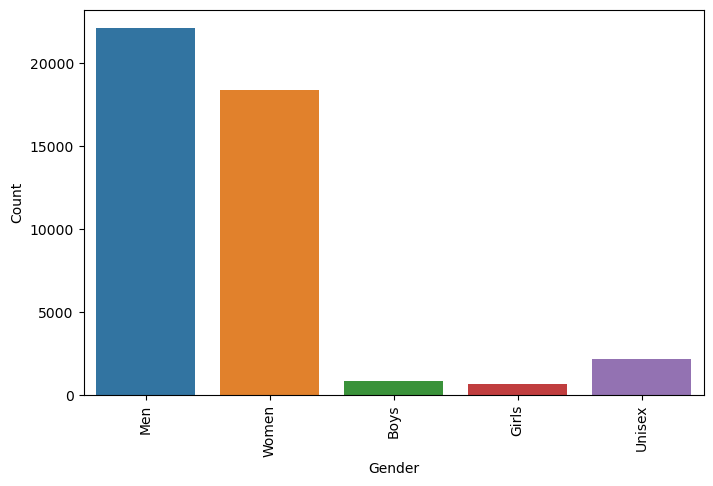

In [49]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [57]:
pd.DataFrame(df['gender'].value_counts())

,gender
Men,22127
Women,18358
Unisex,2129
Boys,830
Girls,655


* In our dataset there are 5 different genders.
* Men : Most of the items are related to the men in our dataset.

# 2. Category

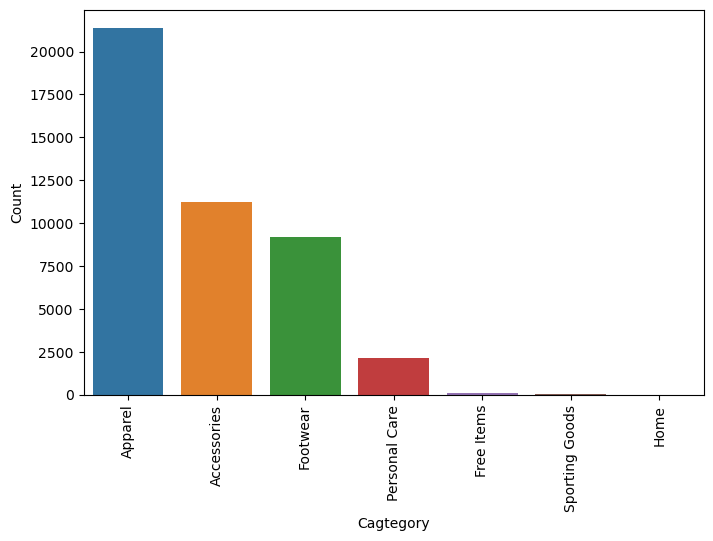

In [51]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'category', data = df)
plt.xlabel('Cagtegory')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [58]:
pd.DataFrame(df['category'].value_counts())

,category
Apparel,21369
Accessories,11259
Footwear,9200
Personal Care,2140
Free Items,105
Sporting Goods,25
Home,1


* There are 7 unique categories in our dataset.
* Most of the items are related to 'Apparel' category.

# 3. Sub-Category

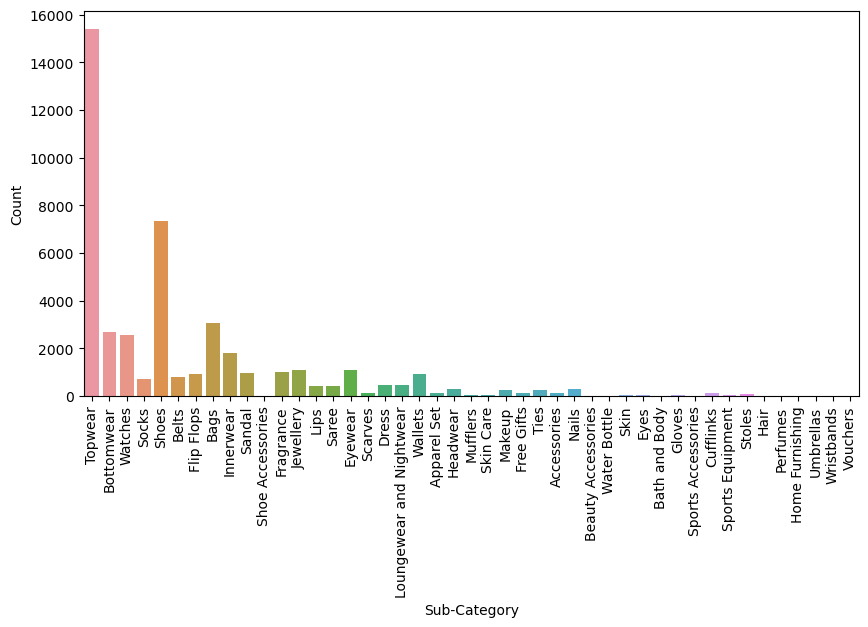

In [56]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'sub_category', data = df)
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [60]:
pd.DataFrame(df['sub_category'].value_counts())

,sub_category
Topwear,15390
Shoes,7324
Bags,3053
Bottomwear,2686
Watches,2542
Innerwear,1806
Jewellery,1080
Eyewear,1073
Fragrance,1002
Sandal,961


* We have most of the items from the sub-category 'Topwear' followed by the 'Shoes'.

# 4. Type

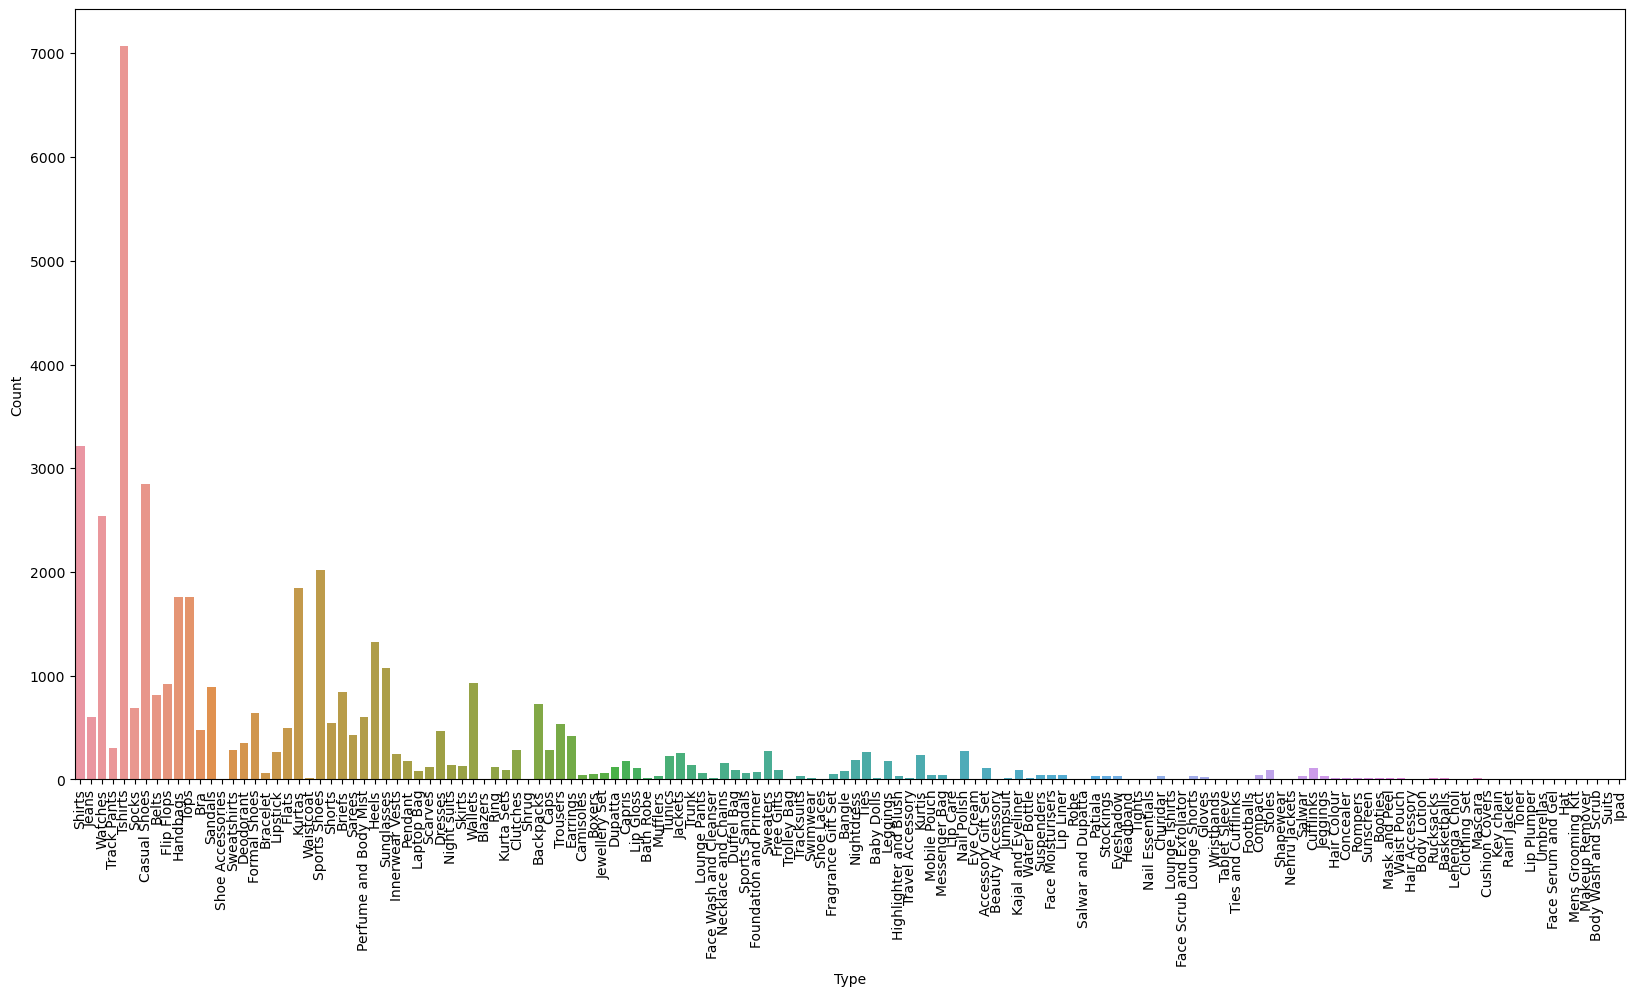

In [64]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'type', data = df)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [61]:
pd.DataFrame(df['type'].value_counts())

,type
Tshirts,7069
Shirts,3214
Casual Shoes,2846
Watches,2542
Sports Shoes,2016
...,...
Mens Grooming Kit,1
Cushion Covers,1
Body Wash and Scrub,1
Suits,1


* Most of the items are 'Tshirts' followed by the 'shirts' in the dataset.

# 5. Season

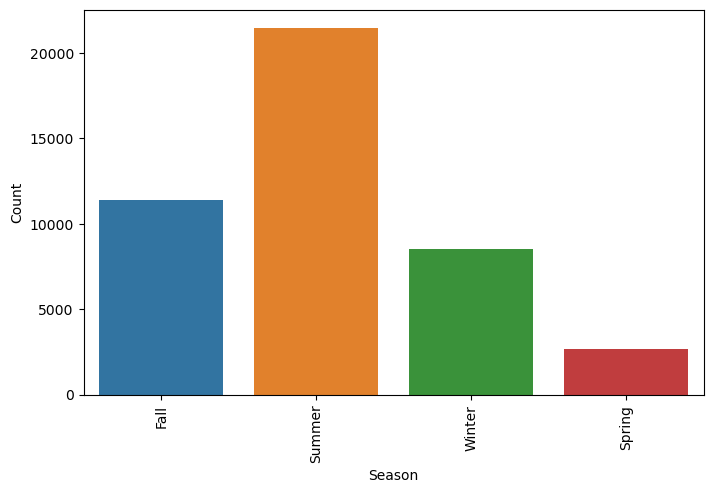

In [66]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'season', data = df)
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [67]:
pd.DataFrame(df['season'].value_counts())

,season
Summer,21444
Fall,11428
Winter,8513
Spring,2714


* We have most of the collection for 'Summer' in the dataset.

# 6. Year

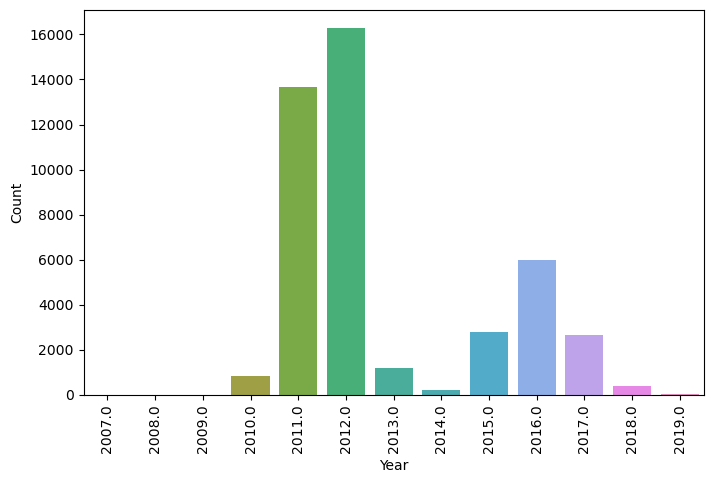

In [72]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'year', data = df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [71]:
pd.DataFrame(df['year'].value_counts())

,year
2012.0,16270
2011.0,13651
2016.0,5999
2015.0,2775
2017.0,2650
2013.0,1206
2010.0,846
2018.0,404
2014.0,236
2019.0,33


* Most of the items are manufactured in the year 2012.

# 7. Usage

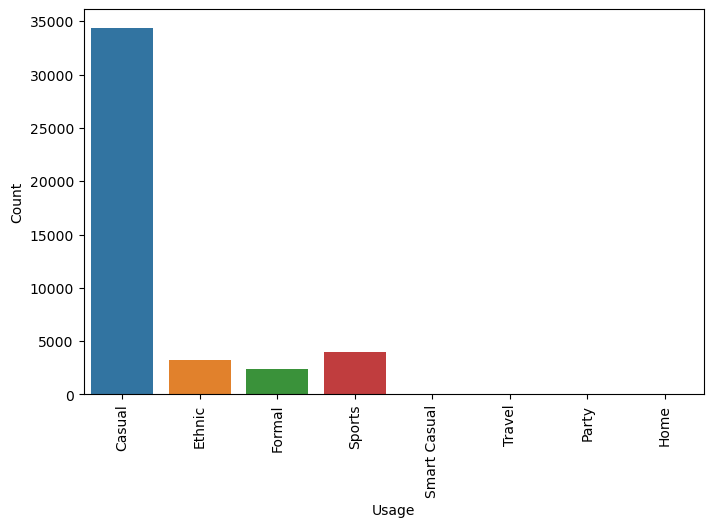

In [73]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'usage', data = df)
plt.xlabel('Usage')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* We have most of the Casual wears in the dataset.